In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [3]:
df1 = pd.read_csv('ConsumerElectronics.csv')

In [4]:
df1.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null object
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null float64
order_item_id                      1648824 non-null float64
gmv                                1648824 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1648824 non-null object
pincode                            1648824 non-null object
product_analytic_super_category    1648824 non-null object
prod

Lets check each column one by one

In [6]:
#converting order_date to datetime
df1['order_date'] = pd.to_datetime(df1['order_date'])

In [7]:
df1['order_date'].dtype

dtype('<M8[ns]')

We have to check if year and month match the order_date

In [8]:
df1 = df1[ df1['order_date'].dt.year == df1['Year']]

In [9]:
df1.shape

(1648824, 20)

In [10]:
df1 = df1[ df1['order_date'].dt.month == df1['Month']]

In [11]:
df1.shape

(1648824, 20)

df1.shape remain the same. Hence data is consistent

In [12]:
# We have to covert order_id and order_item_id into proper format

In [13]:
df1['order_id'] = df1['order_id'].map(lambda x : '{:.0f}'.format(x))

In [14]:
df1['order_item_id'] = df1['order_item_id'].map(lambda x : '{:.0f}'.format(x))

In [15]:
df1.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [16]:
df1.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                   object
order_item_id                              object
gmv                                        object
units                                       int64
deliverybdays                              object
deliverycdays                              object
s1_fact.order_payment_type                 object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64


order_id and order_item_id are object types now

In [18]:
#gmv
#gmv should not be object type
df1['gmv'] = pd.to_numeric(df1['gmv'])

ValueError: Unable to parse string " " at position 8

In [19]:
df1.iloc[8, 6]

' '

In [20]:
df1.replace(' ', value = np.nan, inplace=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1648824 non-null object
order_date                         1648824 non-null datetime64[ns]
Year                               1648824 non-null int64
Month                              1648824 non-null int64
order_id                           1648824 non-null object
order_item_id                      1648824 non-null object
gmv                                1643920 non-null object
units                              1648824 non-null int64
deliverybdays                      1648824 non-null object
deliverycdays                      1648824 non-null object
s1_fact.order_payment_type         1648824 non-null object
sla                                1648824 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1648824 non-null objec

In [22]:
df1.isnull().sum()

fsn_id                                0
order_date                            0
Year                                  0
Month                                 0
order_id                              0
order_item_id                         0
gmv                                4904
units                                 0
deliverybdays                         0
deliverycdays                         0
s1_fact.order_payment_type            0
sla                                   0
cust_id                            4904
pincode                            4904
product_analytic_super_category       0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
dtype: int64

In [23]:
len(df1.index)

1648824

In [24]:
df1.dropna(inplace=True)

In [25]:
df1['gmv'] = pd.to_numeric(df1['gmv'])

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 20 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null object
order_item_id                      1643920 non-null object
gmv                                1643920 non-null float64
units                              1643920 non-null int64
deliverybdays                      1643920 non-null object
deliverycdays                      1643920 non-null object
s1_fact.order_payment_type         1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1643920 non-null obje

In [27]:
df1['deliverybdays'].value_counts()

\N     1308070
4        62062
5        60594
3        53701
6        48655
2        37513
7        25566
1        19862
8        12464
9         5929
10        2924
0         2359
11        1552
12         870
13         448
14         255
15         164
16          94
17          80
18          47
19          47
20          25
21          20
26          20
23          18
38          16
27          16
28          15
32          15
72          13
        ...   
120          1
114          1
-10          1
85           1
-39          1
-12          1
-74          1
-13          1
147          1
-22          1
-73          1
153          1
-44          1
-76          1
135          1
-46          1
-42          1
148          1
115          1
-98          1
90           1
-40          1
124          1
77           1
-14          1
145          1
-45          1
-56          1
238          1
-41          1
Name: deliverybdays, Length: 143, dtype: int64

In [28]:
df1['deliverycdays'].value_counts()

\N      1308069
5         56417
6         51930
4         50627
3         40504
7         38456
2         28175
8         23259
1         15435
9         13536
10         7291
11         3885
12         2085
13         1215
14          656
0           538
15          423
16          235
17          161
18          119
19           85
20           68
21           38
22           34
23           31
24           19
27           17
31           17
32           16
29           12
         ...   
-879          1
-871          1
100           1
-153          1
-516          1
-837          1
157           1
-512          1
154           1
-832          1
-836          1
-16           1
-859          1
90            1
278           1
-628          1
-466          1
-115          1
169           1
-834          1
-840          1
-492          1
-510          1
-482          1
145           1
80            1
-14           1
-476          1
-849          1
-844          1
Name: deliverycdays, Len

In [31]:
df1.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace=True)

In [29]:
df1.rename(columns = {'s1_fact.order_payment_type': 'order_payment_type'}, inplace = True)

In [32]:
df1.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [33]:
df1['order_payment_type'].value_counts()

COD        1191443
Prepaid     452477
Name: order_payment_type, dtype: int64

In [34]:
df1['cust_id'] = df1['cust_id'].astype('float').map(lambda x: '{:.0f}'.format(x)) 

In [35]:
pd.options.display.float_format = '{:.0f}'.format

In [36]:
df1.dtypes

fsn_id                                     object
order_date                         datetime64[ns]
Year                                        int64
Month                                       int64
order_id                                   object
order_item_id                              object
gmv                                       float64
units                                       int64
order_payment_type                         object
sla                                         int64
cust_id                                    object
pincode                                    object
product_analytic_super_category            object
product_analytic_category                  object
product_analytic_sub_category              object
product_analytic_vertical                  object
product_mrp                                 int64
product_procurement_sla                     int64
dtype: object

In [37]:
df1['cust_id'].str.contains('-').sum() / len(df1.index)

0.5008844712638084

In [38]:
#replacing the negative sign
df1['cust_id'] = df1['cust_id'].str.replace('-', '')

In [39]:
df1.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400,1,COD,5,1012991307785880064,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900,1,COD,7,8990324579055120384,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990,1,COD,10,1040442942046599936,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690,1,Prepaid,4,7604960843527140352,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618,1,Prepaid,6,2894557208345299968,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [40]:
#pincode

In [41]:
df1['pincode'] = df1['pincode'].astype('float').map(lambda x: '{:.0f}'.format(x))

In [42]:
df1['pincode']

0          -7791755829057349632
1           7335411490974310400
2          -7477687762286570496
3          -5835931638776609792
4            534735360997241984
5          -1919052697560310016
6           6404913202077570048
7          -1606303052019810048
9           -977901032130400000
10          7335411490974310400
11         -4769170644252180480
12         -7708160341195549696
13          6513330541343979520
14         -4383811865114310144
15         -6653644976793990144
16          5726907372992780288
17          7226616040407520256
18          6195476392333559808
19          -720491563443864960
20            70977690423612200
21         -5792152275811860480
22         -3614428528596839936
23            82482216656899904
24         -7770189663308850176
25         -6508700602667889664
26         -7898945419874690048
27          4396123426029219840
28          -105652543476615008
29          6807347461095109632
30          3630072327460210176
                   ...         
1648794 

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1643920 entries, 0 to 1648823
Data columns (total 18 columns):
fsn_id                             1643920 non-null object
order_date                         1643920 non-null datetime64[ns]
Year                               1643920 non-null int64
Month                              1643920 non-null int64
order_id                           1643920 non-null object
order_item_id                      1643920 non-null object
gmv                                1643920 non-null float64
units                              1643920 non-null int64
order_payment_type                 1643920 non-null object
sla                                1643920 non-null int64
cust_id                            1643920 non-null object
pincode                            1643920 non-null object
product_analytic_super_category    1643920 non-null object
product_analytic_category          1643920 non-null object
product_analytic_sub_category      1643920 non-null obje

In [44]:
df1.drop(['pincode'], axis = 1, inplace = True)

### Drop_duplicates

In [45]:
len(df1['cust_id'].unique())

1201089

In [46]:
len(df1['order_id'].unique())

1497298

In [47]:
len(df1['order_item_id'].unique())

1477119

In [48]:
df1['order_item_id'].duplicated()

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
30         False
           ...  
1648794     True
1648795     True
1648796     True
1648797     True
1648798     True
1648799     True
1648800     True
1648801     True
1648802     True
1648803     True
1648804     True
1648805     True
1648806     True
1648807     True
1648808     True
1648809     True
1648810     True
1648811     True
1648812     True
1648813     True
1648814     True
1648815     True
1648816     True
1648817     True
1648818     True
1648819     True
1648820     True
1648821     Tr

In [49]:
bool1 = df1.duplicated()

In [50]:
df1[bool1]

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,cust_id,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
76506,ACCE6YVWVHXXKCHW,2016-02-22 14:52:12,2016,2,3417290135521600,3417290135521600,350,1,Prepaid,8,1070357817353149952,CE,GamingHardware,GamingAccessory,JoystickGamingWheel,599,2
675305,ACCE7AV9TZHHAESC,2016-04-27 07:03:09,2016,4,2532857872757300,2532857872757300,4090,1,Prepaid,5,233114630667481984,CE,GamingHardware,GamingAccessory,GamePad,4990,2
863407,ACCEEHPA7NNKCAME,2016-04-27 00:36:42,2016,4,2560763032511400,2560763032511400,798,1,Prepaid,6,4645405676797639680,CE,CameraAccessory,CameraStorage,CameraStorageMemoryCard,1599,3
932794,VGLE6NYDQZHZFB3A,2016-04-27 00:15:53,2016,4,1559543157127200,1559543157127200,290,1,Prepaid,12,7385644561775210496,CE,EntertainmentSmall,TVVideoSmall,VideoGlasses,999,5
944830,ACCDH7MFZJGRWJCW,2016-04-27 00:19:25,2016,4,3575842474884000,300037347717633984,287,1,Prepaid,5,8788006738130379776,CE,GamingHardware,GamingAccessory,GamePad,410,1
944903,ACCDH7MFZJGRWJCW,2016-04-27 00:19:25,2016,4,3575842474884000,3575842474884000,287,1,Prepaid,7,8788006738130379776,CE,GamingHardware,GamingAccessory,GamePad,410,1
969493,ACCE94WYZR6GFDFP,2016-04-27 00:33:53,2016,4,1569690464156100,1569690464156100,190,1,Prepaid,6,6615160307439460352,CE,CameraAccessory,CameraAccessory,Filter,380,1
969502,ACCE94WYZR6GFDFP,2016-04-27 00:33:53,2016,4,1569690464156100,300037347717548032,190,1,Prepaid,4,6615160307439460352,CE,CameraAccessory,CameraAccessory,Filter,380,1
973152,ACCE9TUXMCEFMPGH,2016-04-29 16:11:19,2016,4,1587816351831000,1587816351831000,260,1,Prepaid,6,8231903321653099520,CE,GamingHardware,GamingAccessory,GamePad,280,3
984106,ACCEBG5NYJKEVHMA,2016-04-27 00:39:39,2016,4,2581690691036500,2581690691036500,449,1,Prepaid,8,650212886872878976,CE,EntertainmentSmall,Speaker,MobileSpeaker,799,3


In [51]:
df1.drop_duplicates(inplace = True)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539832 entries, 0 to 1543996
Data columns (total 17 columns):
fsn_id                             1539832 non-null object
order_date                         1539832 non-null datetime64[ns]
Year                               1539832 non-null int64
Month                              1539832 non-null int64
order_id                           1539832 non-null object
order_item_id                      1539832 non-null object
gmv                                1539832 non-null float64
units                              1539832 non-null int64
order_payment_type                 1539832 non-null object
sla                                1539832 non-null int64
cust_id                            1539832 non-null object
product_analytic_super_category    1539832 non-null object
product_analytic_category          1539832 non-null object
product_analytic_sub_category      1539832 non-null object
product_analytic_vertical          1539832 non-null obje

In [53]:
df1.duplicated().sum()

0

In [54]:
len(df1['order_item_id'].unique())

1477119

In [55]:
df1['order_item_id'].duplicated().sum()

62713

In [56]:
df1.drop_duplicates(subset = ['order_item_id'], keep='first', inplace=True)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477119 entries, 0 to 1543996
Data columns (total 17 columns):
fsn_id                             1477119 non-null object
order_date                         1477119 non-null datetime64[ns]
Year                               1477119 non-null int64
Month                              1477119 non-null int64
order_id                           1477119 non-null object
order_item_id                      1477119 non-null object
gmv                                1477119 non-null float64
units                              1477119 non-null int64
order_payment_type                 1477119 non-null object
sla                                1477119 non-null int64
cust_id                            1477119 non-null object
product_analytic_super_category    1477119 non-null object
product_analytic_category          1477119 non-null object
product_analytic_sub_category      1477119 non-null object
product_analytic_vertical          1477119 non-null obje

In [58]:
len(df1['order_id'].unique())

1474762

In [59]:
df1['order_id'].duplicated().sum()

2357

1477119 - 1474762 = 2357. Hence it matches.
An order_id can have multiple order_item_id

#we need data from july-2015(2015-07-01) to june-2016(2016-06-30)

In [60]:
#oldest timestamp in our data
df1['order_date'].min(axis=0)

Timestamp('2015-05-19 13:42:09')

In [61]:
#latest timestamp in our data
df1['order_date'].max(axis=0)

Timestamp('2016-07-25 01:19:45')

In [62]:
#Filtering the data
df1 = df1[(df1['order_date'] >= pd.to_datetime('2015-07-01')) & (df1['order_date'] <= pd.to_datetime('2016-06-30'))]

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473314 entries, 0 to 1543996
Data columns (total 17 columns):
fsn_id                             1473314 non-null object
order_date                         1473314 non-null datetime64[ns]
Year                               1473314 non-null int64
Month                              1473314 non-null int64
order_id                           1473314 non-null object
order_item_id                      1473314 non-null object
gmv                                1473314 non-null float64
units                              1473314 non-null int64
order_payment_type                 1473314 non-null object
sla                                1473314 non-null int64
cust_id                            1473314 non-null object
product_analytic_super_category    1473314 non-null object
product_analytic_category          1473314 non-null object
product_analytic_sub_category      1473314 non-null object
product_analytic_vertical          1473314 non-null obje

In [64]:
df1['order_date'].min()

Timestamp('2015-07-01 00:36:11')

In [65]:
df1['sla'].value_counts()

6       211955
5       208376
4       196158
7       180241
3       157805
8       138988
2        95666
9        88347
1        67843
10       52255
11       30592
12       17587
13        9945
0         5472
14        5294
15        2882
16        1627
17         809
18         446
19         264
20         149
21         101
25          74
22          66
24          65
23          57
26          52
27          41
28          31
30          28
29          16
31          10
32           8
35           7
33           6
42           5
38           5
39           5
34           4
44           3
41           3
40           3
36           3
61           3
37           2
45           2
60           1
239          1
175          1
145          1
68           1
1004         1
56           1
52           1
51           1
47           1
46           1
43           1
1006         1
Name: sla, dtype: int64

In [66]:
df1['product_procurement_sla'].value_counts()

 2       475557
 1       275089
 3       270464
 5       195728
 4       107758
-1        67365
 0        39408
 6        15405
 7        10809
 15        5977
 14        4624
 1000      3980
 13         470
 8          468
 9           88
 10          68
 12          56
Name: product_procurement_sla, dtype: int64

In [67]:
df1 = df1[(df1['sla'] >=0) & (df1['sla'] <= 60)]

In [68]:
df1 = df1[(df1['product_procurement_sla'] >=0) & (df1['product_procurement_sla'] <= 60)]

In [69]:
df1.shape

(1401964, 17)

In [70]:
df1['product_analytic_super_category'].value_counts()

CE    1401964
Name: product_analytic_super_category, dtype: int64

In [71]:
df1.drop(['product_analytic_super_category'], axis=1, inplace=True)

In [72]:
df1['product_analytic_category'].value_counts()

EntertainmentSmall    807114
CameraAccessory       218717
GamingHardware        203357
GameCDDVD              88118
Camera                 84658
Name: product_analytic_category, dtype: int64

In [73]:
df1['product_analytic_sub_category'].value_counts()

Speaker                455682
CameraAccessory        203040
GamingAccessory        178191
TVVideoSmall           127469
HomeAudio              107763
AudioMP3Player          98914
Game                    88040
Camera                  84658
GamingConsole           25166
CameraStorage           15677
AudioAccessory           9924
HomeTheatre              4109
AmplifierReceiver        3253
GameMembershipCards        78
Name: product_analytic_sub_category, dtype: int64

In [74]:
df = df1[(df1['product_analytic_sub_category'] == 'CameraAccessory') |
         (df1['product_analytic_sub_category'] == 'GamingAccessory') |
         (df1['product_analytic_sub_category'] == 'HomeAudio')]

In [75]:
df.shape

(488994, 16)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488994 entries, 0 to 1542378
Data columns (total 16 columns):
fsn_id                           488994 non-null object
order_date                       488994 non-null datetime64[ns]
Year                             488994 non-null int64
Month                            488994 non-null int64
order_id                         488994 non-null object
order_item_id                    488994 non-null object
gmv                              488994 non-null float64
units                            488994 non-null int64
order_payment_type               488994 non-null object
sla                              488994 non-null int64
cust_id                          488994 non-null object
product_analytic_category        488994 non-null object
product_analytic_sub_category    488994 non-null object
product_analytic_vertical        488994 non-null object
product_mrp                      488994 non-null int64
product_procurement_sla          488994 non-

In [77]:
df['product_mrp'].min()

63

In [78]:
df[['gmv', 'units', 'product_mrp']]

,gmv,units,product_mrp
0,6400,1,7190
1,6900,1,7190
2,1990,1,2099
3,1690,1,2099
4,1618,1,2099
5,3324,1,4044
6,3695,1,4044
7,3695,1,4044
9,3695,1,4044
10,3695,1,4044


In [79]:
df['week'] = df['order_date'].dt.week

In [80]:
df['week'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [82]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,week
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400,1,COD,5,1012991307785880064,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900,1,COD,7,8990324579055120384,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990,1,COD,10,1040442942046599936,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690,1,Prepaid,4,7604960843527140352,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618,1,Prepaid,6,2894557208345299968,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42


In [83]:
#Derive features

In [84]:
#creating a new feature: sla - product_procurement_sla
df['sla_diff'] = df['sla'] - df['product_procurement_sla']

In [85]:
df.head(10)

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,week,sla_diff
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400,1,COD,5,1012991307785880064,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,5
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900,1,COD,7,8990324579055120384,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,7
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990,1,COD,10,1040442942046599936,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,7
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690,1,Prepaid,4,7604960843527140352,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,1
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618,1,Prepaid,6,2894557208345299968,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,3
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3419188825145600,3419188825145600,3324,1,Prepaid,5,7641546361891739648,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,0
6,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3418428515041500,3418428515041500,3695,1,Prepaid,6,71561404148106600,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,1
7,ACCCX3S5JGAJETYR,2015-10-15 23:41:39,2015,10,3417799002820700,3417799002820700,3695,1,COD,5,9173275962341520384,CameraAccessory,CameraAccessory,CameraTripod,4044,5,42,0
9,ACCCX3S5JGAJETYR,2015-10-25 22:52:34,2015,10,4426481574167600,4426481574167600,3695,1,COD,7,7809156068961630208,CameraAccessory,CameraAccessory,CameraTripod,4044,5,43,2
10,ACCCX3S5JGAJETYR,2015-10-19 09:37:06,2015,10,2420828677270800,2420828677270800,3695,1,COD,8,8990324579055120384,CameraAccessory,CameraAccessory,CameraTripod,4044,5,43,3


In [86]:
df['units'].value_counts()

1     480300
2       7239
3        829
4        273
5        175
6         63
10        58
8         21
7         16
9          9
12         3
15         3
34         1
13         1
17         1
18         1
39         1
Name: units, dtype: int64

#### Checking the relationship between gmc, units and mrp

In [87]:
df3 = df[['gmv', 'units', 'product_mrp']]

In [88]:
df3[df3['units'] > 1].count()

gmv            8694
units          8694
product_mrp    8694
dtype: int64

In [89]:
df3[df3['units'] == 1].count()

gmv            480300
units          480300
product_mrp    480300
dtype: int64

In [90]:
df3[(df3['units'] == 1) & (df3['gmv'] < df3['product_mrp'])].count()

gmv            465524
units          465524
product_mrp    465524
dtype: int64

In [91]:
df3[(df3['gmv'] > (df3['product_mrp']*df3['units']))].count()

gmv            11258
units          11258
product_mrp    11258
dtype: int64

In [92]:
#keeping only the columns where gmv <= mrp * units
df = df[(df['gmv'] <= (df['product_mrp']*df['units']))]

In [96]:
df.shape

(477736, 18)

In [95]:
df.describe()

,Year,Month,gmv,units,sla,product_mrp,product_procurement_sla,week,sla_diff
count,477736,477736,477736,477736,477736,477736,477736,477736,477736
mean,2016,6,1275,1,6,2523,3,26,3
std,0,4,2389,0,3,4753,2,16,3
min,2015,1,0,1,0,99,0,1,-14
25%,2015,3,295,1,4,790,2,11,1
50%,2016,5,545,1,6,1247,2,22,3
75%,2016,10,1499,1,7,2800,3,42,5
max,2016,12,148050,39,60,180000,15,53,59


In [99]:
#creating column discount
df['discount_percentage'] =  (100 *(df['product_mrp'] * df['units'] - df['gmv'])) / (df['product_mrp'] * df['units'])

In [102]:
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,order_payment_type,sla,cust_id,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,week,sla_diff,discount_percentage
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000,3419300926147000,6400,1,COD,5,1012991307785880064,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,5,11
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200,1420830839915200,6900,1,COD,7,8990324579055120384,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,7,4
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800,2421912925714800,1990,1,COD,10,1040442942046599936,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,7,5
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400,4416592101738400,1690,1,Prepaid,4,7604960843527140352,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,1,19
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400,4419525153426400,1618,1,Prepaid,6,2894557208345299968,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,3,23


In [103]:
#categorical columns
cat_columns = df.select_dtypes(include = ['object']).columns

In [104]:
cat_columns

Index(['fsn_id', 'order_id', 'order_item_id', 'order_payment_type', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical'],
      dtype='object')

In [105]:
df['product_analytic_category'].value_counts()

CameraAccessory       199634
GamingHardware        175062
EntertainmentSmall    103040
Name: product_analytic_category, dtype: int64

In [106]:
df['product_analytic_sub_category'].value_counts()

CameraAccessory    199634
GamingAccessory    175062
HomeAudio          103040
Name: product_analytic_sub_category, dtype: int64

In [107]:
df['product_analytic_vertical'].value_counts()

HomeAudioSpeaker         73793
GamingHeadset            57876
GamePad                  48780
Flash                    46946
GamingMouse              33617
CameraBattery            31329
CameraTripod             29860
Lens                     29116
FMRadio                  20082
CameraBag                15015
CameraBatteryCharger     12721
Binoculars               12533
Filter                    9633
GamingAccessoryKit        7217
TVOutCableAccessory       6183
GamingKeyboard            5911
GamingMemoryCard          5523
CameraRemoteControl       5056
VoiceRecorder             3246
GamingMousePad            3010
GamingAdapter             2917
JoystickGamingWheel       2540
BoomBox                   2273
Dock                      1764
Telescope                 1633
CameraAccessory           1608
Strap                     1409
HiFiSystem                1319
CameraFilmRolls           1257
CameraMount                960
MotionController           923
GamingSpeaker              476
DockingS

## importing excel file

In [3]:
df_ex1 = pd.read_excel('Media data and other information.xlsx', sheet_name=0, )

In [4]:
df_ex1

,Unnamed: 0,Unnamed: 1,Frequency,Percent
0,NaN,\N,5828,0.353464
1,NaN,AmplifierReceiver,4056,0.245994
2,NaN,AudioMP3Player,112892,6.846819
3,NaN,Binoculars,14599,0.885419
4,NaN,BoomBox,2879,0.174609
5,NaN,Camcorders,987,0.059861
6,NaN,CameraAccessory,2269,0.137613
7,NaN,CameraBag,17523,1.062757
8,NaN,CameraBattery,41307,2.505240
9,NaN,CameraBatteryCharger,15660,0.949768


In [5]:
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df_ex1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df_ex1.rename(columns = {'Unnamed: 1': 'Product'}, inplace = True)

In [8]:
#dropping product with name \N
df_ex1.drop(index = 0, inplace = True)

In [9]:
df_ex1.head()

,Product,Frequency,Percent
1,AmplifierReceiver,4056,0.25
2,AudioMP3Player,112892,6.85
3,Binoculars,14599,0.89
4,BoomBox,2879,0.17
5,Camcorders,987,0.06


In [10]:
#accessing the second sheet
df_ex2 = pd.read_excel('Media data and other information.xlsx', sheet_name=1, header = 2)

In [11]:
df_ex2

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
nan,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
nan,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
nan,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
nan,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
nan,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan
nan,2015.00,12.00,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,nan,nan
nan,2016.00,1.00,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
nan,2016.00,2.00,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,nan,nan
nan,2016.00,3.00,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
nan,2016.00,4.00,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,nan,nan


In [12]:
df_ex2.reset_index(inplace = True, drop = True)
#using drop = True will not add the old index as column

In [13]:
df_ex2

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan
5,2015.00,12.00,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,nan,nan
6,2016.00,1.00,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
7,2016.00,2.00,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,nan,nan
8,2016.00,3.00,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
9,2016.00,4.00,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,nan,nan


In [14]:
df_ex2 = df_ex2.iloc[0:12]

In [15]:
df_ex2

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015.00,7.00,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,2015.00,8.00,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,2015.00,9.00,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,2015.00,10.00,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,2015.00,11.00,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan
5,2015.00,12.00,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,nan,nan
6,2016.00,1.00,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
7,2016.00,2.00,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,nan,nan
8,2016.00,3.00,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
9,2016.00,4.00,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,nan,nan


In [16]:
df_ex2.dtypes

Year                 float64
Month                float64
Total Investment     float64
TV                   float64
Digital              float64
Sponsorship          float64
Content Marketing    float64
Online marketing     float64
 Affiliates          float64
SEM                  float64
Radio                float64
Other                float64
dtype: object

In [17]:
#accessing the fourth sheet
df_ex4 = pd.read_excel('Media data and other information.xlsx', sheet_name = 3)

In [18]:
df_ex4.head()

,Unnamed: 0,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
1,Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [19]:
df_ex4.set_index(['Unnamed: 0'], inplace = True)

In [20]:
df_ex4

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
Unnamed: 0,,,,,,,,,,,,
NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [21]:
df_ex4.index

Index(['NPS', 'Stock Index'], dtype='object', name='Unnamed: 0')

In [22]:
df_ex4.index.name = ""

In [23]:
df_ex4.index

Index(['NPS', 'Stock Index'], dtype='object', name='')

In [24]:
df_ex4

,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
,,,,,,,,,,,,
NPS,54.60,59.99,46.93,44.40,47.00,45.80,47.09,50.33,49.02,51.83,47.31,50.52
Stock Index,1177.00,1206.00,1101.00,1210.00,1233.00,1038.00,1052.00,1222.00,1015.00,1242.00,1228.00,1194.00


In [25]:
df_ex4 = df_ex4.T
df_ex4

,NPS,Stock Index
July'15,54.60,1177.00
Aug'15,59.99,1206.00
Sept'15,46.93,1101.00
Oct'15,44.40,1210.00
Nov'15,47.00,1233.00
Dec'15,45.80,1038.00
Jan'16,47.09,1052.00
Feb'16,50.33,1222.00
Mar'16,49.02,1015.00
Apr'16,51.83,1242.00


In [26]:
df['Month'].unique()

NameError: name 'df' is not defined

In [27]:
df_ex4.index = list([7,8,9,10,11,12,1,2,3,4,5,6])

In [28]:
df_ex4

,NPS,Stock Index
7,54.60,1177.00
8,59.99,1206.00
9,46.93,1101.00
10,44.40,1210.00
11,47.00,1233.00
12,45.80,1038.00
1,47.09,1052.00
2,50.33,1222.00
3,49.02,1015.00
4,51.83,1242.00


In [29]:
df_ex4.index.name = 'Month'

In [30]:
df_ex4.index.name

'Month'

In [31]:
print(df_ex1)
print(df_ex2)
print(df_ex4)

                    Product  Frequency  Percent
1         AmplifierReceiver       4056     0.25
2            AudioMP3Player     112892     6.85
3                Binoculars      14599     0.89
4                   BoomBox       2879     0.17
5                Camcorders        987     0.06
6           CameraAccessory       2269     0.14
7                 CameraBag      17523     1.06
8             CameraBattery      41307     2.51
9      CameraBatteryCharger      15660     0.95
10        CameraBatteryGrip        401     0.02
11             CameraEyeCup         98     0.01
12          CameraFilmRolls       1905     0.12
13            CameraHousing         19     0.00
14           CameraLEDLight          3     0.00
15         CameraMicrophone         51     0.00
16              CameraMount       1129     0.07
17      CameraRemoteControl       6061     0.37
18  CameraStorageMemoryCard      17985     1.09
19             CameraTripod      37909     2.30
20         CodeInTheBoxGame       9345  

# 2015 Climate Data

In [170]:
climate_2015 = pd.read_csv("ONTARIO-2015.csv", header = 22)

In [171]:
climate_2015

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2015-01-01,2015,1,1,†,0.00,NaN,-8.50,NaN,-4.30,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
1,2015-01-02,2015,1,2,†,3.00,NaN,-3.00,NaN,0.00,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan
2,2015-01-03,2015,1,3,†,2.50,NaN,-4.00,NaN,-0.80,...,0.00,NaN,24.00,NaN,0.00,NaN,nan,nan,nan,nan
3,2015-01-04,2015,1,4,†,2.50,NaN,0.00,NaN,1.30,...,1.00,NaN,1.00,NaN,0.00,NaN,nan,nan,nan,nan
4,2015-01-05,2015,1,5,†,-10.00,NaN,-13.50,NaN,-11.80,...,3.00,NaN,3.00,NaN,1.00,NaN,nan,nan,nan,nan
5,2015-01-06,2015,1,6,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
6,2015-01-07,2015,1,7,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
7,2015-01-08,2015,1,8,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
8,2015-01-09,2015,1,9,†,-7.00,NaN,-14.00,NaN,-10.50,...,0.00,NaN,0.00,NaN,4.00,NaN,nan,nan,nan,nan
9,2015-01-10,2015,1,10,†,-2.50,NaN,nan,M,nan,...,0.00,NaN,0.00,NaN,0.00,NaN,nan,nan,nan,nan


In [172]:
climate_2015.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [173]:
climate_2015.shape

(365, 27)

In [174]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null object
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Snow Flag 

In [175]:
climate_2015['Date/Time'] = pd.to_datetime(climate_2015['Date/Time'])

In [176]:
climate_2015['Date/Time'].dtype

dtype('<M8[ns]')

In [177]:
climate_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 27 columns):
Date/Time                    365 non-null datetime64[ns]
Year                         365 non-null int64
Month                        365 non-null int64
Day                          365 non-null int64
Data Quality                 229 non-null object
Max Temp (°C)                216 non-null float64
Max Temp Flag                13 non-null object
Min Temp (°C)                190 non-null float64
Min Temp Flag                39 non-null object
Mean Temp (°C)               190 non-null float64
Mean Temp Flag               39 non-null object
Heat Deg Days (°C)           190 non-null float64
Heat Deg Days Flag           39 non-null object
Cool Deg Days (°C)           190 non-null float64
Cool Deg Days Flag           39 non-null object
Total Rain (mm)              229 non-null float64
Total Rain Flag              7 non-null object
Total Snow (cm)              229 non-null float64
Total Sn

In [178]:
c1 = climate_2015

In [179]:
c1.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [180]:
#we only need climate data from July 2015
c1 = c1[c1['Date'] >= pd.to_datetime('2015-07-01')]

In [181]:
c1.shape

(184, 27)

In [182]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 27 columns):
Date                         184 non-null datetime64[ns]
Year                         184 non-null int64
Month                        184 non-null int64
Day                          184 non-null int64
Data Quality                 115 non-null object
Max Temp (°C)                109 non-null float64
Max Temp Flag                6 non-null object
Min Temp (°C)                98 non-null float64
Min Temp Flag                17 non-null object
Mean Temp (°C)               98 non-null float64
Mean Temp Flag               17 non-null object
Heat Deg Days (°C)           98 non-null float64
Heat Deg Days Flag           17 non-null object
Cool Deg Days (°C)           98 non-null float64
Cool Deg Days Flag           17 non-null object
Total Rain (mm)              115 non-null float64
Total Rain Flag              5 non-null object
Total Snow (cm)              115 non-null float64
Total Snow 

In [183]:
round((c1.isnull().sum() / len(c1.index)) *100, 2)
#below is a series

Date                          0.00
Year                          0.00
Month                         0.00
Day                           0.00
Data Quality                 37.50
Max Temp (°C)                40.76
Max Temp Flag                96.74
Min Temp (°C)                46.74
Min Temp Flag                90.76
Mean Temp (°C)               46.74
Mean Temp Flag               90.76
Heat Deg Days (°C)           46.74
Heat Deg Days Flag           90.76
Cool Deg Days (°C)           46.74
Cool Deg Days Flag           90.76
Total Rain (mm)              37.50
Total Rain Flag              97.28
Total Snow (cm)              37.50
Total Snow Flag              99.46
Total Precip (mm)            37.50
Total Precip Flag            97.28
Snow on Grnd (cm)            37.50
Snow on Grnd Flag            98.91
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [184]:
c1['Mean Temp Flag'].value_counts()

M    17
Name: Mean Temp Flag, dtype: int64

In [185]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c1.isnull().sum() / len(c1.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [186]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                96.74
Min Temp Flag                90.76
Mean Temp Flag               90.76
Heat Deg Days Flag           90.76
Cool Deg Days Flag           90.76
Total Rain Flag              97.28
Total Snow Flag              99.46
Total Precip Flag            97.28
Snow on Grnd Flag            98.91
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [187]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [188]:
c1.drop(cols, axis=1, inplace=True)
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 181 to 364
Data columns (total 14 columns):
Date                  184 non-null datetime64[ns]
Year                  184 non-null int64
Month                 184 non-null int64
Day                   184 non-null int64
Data Quality          115 non-null object
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.6+ KB


In [189]:
c1['Data Quality'].value_counts()

†    115
Name: Data Quality, dtype: int64

In [190]:
#dropping the column Data Quality
c1.drop(['Data Quality'], axis=1, inplace=True)

In [191]:
c1

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
181,2015-07-01,2015,7,1,24.50,17.00,20.80,0.00,2.80,0.00,0.00,0.00,0.00
182,2015-07-02,2015,7,2,24.00,14.00,19.00,0.00,1.00,0.00,0.00,0.00,0.00
183,2015-07-03,2015,7,3,25.00,10.00,17.50,0.50,0.00,0.00,0.00,0.00,0.00
184,2015-07-04,2015,7,4,26.00,11.00,18.50,0.00,0.50,0.00,0.00,0.00,0.00
185,2015-07-05,2015,7,5,28.00,14.00,21.00,0.00,3.00,0.00,0.00,0.00,0.00
186,2015-07-06,2015,7,6,nan,nan,nan,nan,nan,nan,nan,nan,nan
187,2015-07-07,2015,7,7,26.00,18.00,22.00,0.00,4.00,8.60,0.00,8.60,0.00
188,2015-07-08,2015,7,8,20.00,12.50,16.30,1.70,0.00,14.40,0.00,14.40,0.00
189,2015-07-09,2015,7,9,24.00,17.00,20.50,0.00,2.50,3.50,0.00,3.50,0.00
190,2015-07-10,2015,7,10,26.00,13.00,19.50,0.00,1.50,0.00,0.00,0.00,0.00


Upon visual inspection it is evident that weather data for few rows are completely missing

In [192]:
c1.dropna(thresh = 5, inplace = True)

In [193]:
print(c1.shape, "\n\n")
c1.info()

(115, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


In [194]:
c1['Max Temp (°C)']

181   24.50
182   24.00
183   25.00
184   26.00
185   28.00
187   26.00
188   20.00
189   24.00
190   26.00
191   28.00
192   25.00
194   29.00
195   23.50
196   25.00
197   30.00
198   32.00
199   33.00
200   30.00
202   27.00
203   29.00
204   31.00
205   31.50
206   30.00
207   32.00
208   33.50
210   30.50
211   31.00
212   29.00
213   33.50
215   28.50
       ... 
298   15.50
300   16.00
306   22.00
307   23.00
308   22.00
309   18.00
310   12.50
312   14.50
315   10.50
318   17.00
321   16.00
322   14.50
324    2.00
325    1.50
330   12.00
332    4.50
335    7.50
337    6.50
340    3.00
344   13.00
345   16.00
346   15.00
350   10.50
352    3.00
353    5.50
355   11.50
356   15.50
358     nan
359    9.50
362    6.50
Name: Max Temp (°C), Length: 115, dtype: float64

In [195]:
c1['Max Temp (°C)'].max()

33.5

Text(0,0.5,'Temperature')

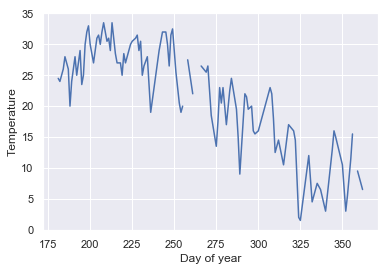

In [196]:
plt.plot(c1['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Count')

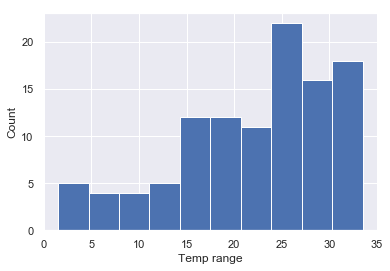

In [197]:
plt.hist(c1['Max Temp (°C)'], range = (c1['Max Temp (°C)'].min(), c1['Max Temp (°C)'].max()))
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

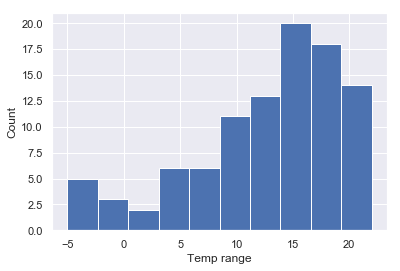

In [198]:
plt.hist(c1['Min Temp (°C)'], range = (c1['Min Temp (°C)'].min(), c1['Min Temp (°C)'].max()), histtype = 'bar')
plt.xlabel('Temp range')
plt.ylabel('Count')

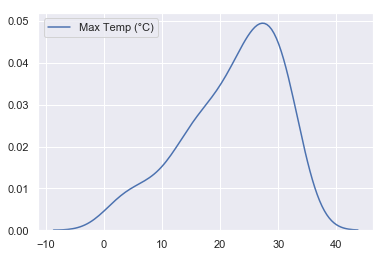

In [199]:
sns.kdeplot(c1['Max Temp (°C)'])

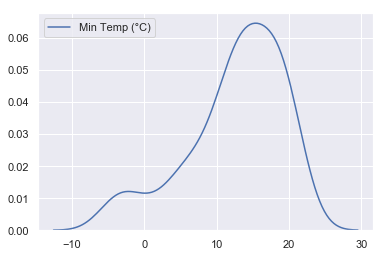

In [200]:
sns.kdeplot(c1['Min Temp (°C)'])

In [201]:
c1['Heat Deg Days (°C)']

181    0.00
182    0.00
183    0.50
184    0.00
185    0.00
187    0.00
188    1.70
189    0.00
190    0.00
191    0.00
192    0.00
194    0.00
195    0.00
196    0.00
197    0.00
198    0.00
199    0.00
200    0.00
202    0.00
203    0.00
204     nan
205    0.00
206    0.00
207    0.00
208    0.00
210    0.00
211    0.00
212    0.00
213    0.00
215    0.00
       ... 
298    9.20
300    5.00
306    3.70
307    4.00
308    1.50
309    3.00
310    8.20
312   11.50
315    9.00
318    7.00
321    4.00
322    7.20
324   17.20
325   19.30
330   10.20
332     nan
335   16.20
337     nan
340   17.70
344    8.70
345    6.50
346    5.00
350     nan
352   18.50
353   17.70
355   10.20
356    9.70
358     nan
359     nan
362   15.70
Name: Heat Deg Days (°C), Length: 115, dtype: float64

(array([66.,  7.,  6.,  3.,  5.,  4.,  0.,  0.,  3.,  4.]),
 array([ 0.  ,  1.93,  3.86,  5.79,  7.72,  9.65, 11.58, 13.51, 15.44,
        17.37, 19.3 ]),
 <a list of 10 Patch objects>)

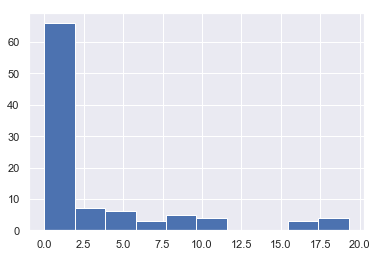

In [202]:
plt.hist(c1['Heat Deg Days (°C)'].dropna())

(array([47.,  4.,  4., 10.,  5.,  6.,  7.,  8.,  5.,  2.]),
 array([0.  , 0.93, 1.86, 2.79, 3.72, 4.65, 5.58, 6.51, 7.44, 8.37, 9.3 ]),
 <a list of 10 Patch objects>)

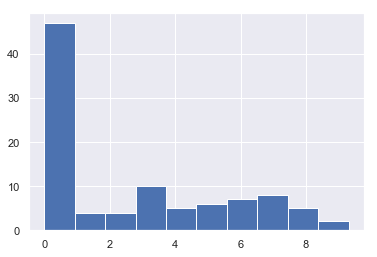

In [203]:
plt.hist(c1['Cool Deg Days (°C)'].dropna())

In [204]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 181 to 362
Data columns (total 13 columns):
Date                  115 non-null datetime64[ns]
Year                  115 non-null int64
Month                 115 non-null int64
Day                   115 non-null int64
Max Temp (°C)         109 non-null float64
Min Temp (°C)         98 non-null float64
Mean Temp (°C)        98 non-null float64
Heat Deg Days (°C)    98 non-null float64
Cool Deg Days (°C)    98 non-null float64
Total Rain (mm)       115 non-null float64
Total Snow (cm)       115 non-null float64
Total Precip (mm)     115 non-null float64
Snow on Grnd (cm)     115 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 12.6 KB


(array([ 5.,  2.,  1.,  8.,  5., 11., 14., 19., 17., 16.]),
 array([-1.3 ,  1.56,  4.42,  7.28, 10.14, 13.  , 15.86, 18.72, 21.58,
        24.44, 27.3 ]),
 <a list of 10 Patch objects>)

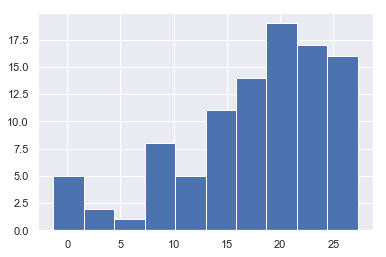

In [205]:
plt.hist(c1['Mean Temp (°C)'].dropna())

In [206]:
#creating week column
c1['week'] = c1['Date'].dt.week

In [207]:
#group by week
c1_grp = c1.groupby('week')

In [208]:
c1.aggregate(['mean', 'min', 'max'])

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
min,2015-07-01,2015.00,7.00,1.00,1.50,-5.00,-1.30,0.00,0.00,0.00,0.00,0.00,0.00,27.00
max,2015-12-29,2015.00,12.00,31.00,33.50,22.00,27.30,19.30,9.30,57.20,10.00,57.20,7.00,53.00
mean,NaT,2015.00,9.12,15.32,22.09,12.57,17.63,2.96,2.59,2.56,0.09,2.65,0.06,38.19


In [209]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c1.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2015 = c1_grp[cols].mean()

In [210]:
climate_2015

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
week,,,,,,,,,,
27,25.50,13.20,19.36,0.10,1.46,0.00,0.00,0.00,0.00,27
28,24.83,15.33,20.10,0.28,2.38,4.42,0.00,4.42,0.00,28
29,28.75,17.58,23.18,0.00,5.18,1.40,0.00,1.40,0.00,29
30,29.75,16.60,23.06,0.00,5.06,0.90,0.00,0.90,0.00,30
31,31.58,17.50,24.57,0.00,6.57,4.63,0.00,4.63,0.00,31
32,27.20,16.00,21.65,0.00,3.65,0.28,0.00,0.28,0.00,32
33,29.62,18.25,23.95,0.00,5.95,2.90,0.00,2.90,0.00,33
34,28.42,18.42,23.45,0.00,5.45,5.13,0.00,5.13,0.00,34
35,24.00,16.50,20.25,0.75,3.00,0.00,0.00,0.00,0.00,35


In [211]:
climate_2015.shape

(27, 10)

# 2016 Climate Data

In [212]:
climate_2016 = pd.read_csv("ONTARIO-2016.csv", header = 22)

In [213]:
climate_2016

,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,2016-01-01,2016,1,1,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
1,2016-01-02,2016,1,2,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
2,2016-01-03,2016,1,3,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
3,2016-01-04,2016,1,4,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
4,2016-01-05,2016,1,5,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
5,2016-01-06,2016,1,6,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
6,2016-01-07,2016,1,7,NaN,nan,NaN,nan,NaN,nan,...,nan,NaN,nan,NaN,nan,NaN,nan,nan,nan,nan
7,2016-01-08,2016,1,8,†,7.00,NaN,-14.00,NaN,-3.50,...,0.00,NaN,9.00,NaN,0.00,NaN,nan,nan,nan,nan
8,2016-01-09,2016,1,9,†,11.00,NaN,3.00,NaN,7.00,...,0.00,T,14.60,NaN,0.00,NaN,nan,nan,nan,nan
9,2016-01-10,2016,1,10,†,-1.50,NaN,-5.00,NaN,-3.30,...,7.00,NaN,7.00,NaN,0.00,T,nan,nan,nan,nan


In [214]:
climate_2016.columns

Index(['Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [215]:
climate_2016.shape

(366, 27)

In [216]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null object
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Flag      

In [217]:
climate_2016['Date/Time'] = pd.to_datetime(climate_2016['Date/Time'], errors = 'coerce')

In [218]:
climate_2016['Date/Time'].dtype

dtype('<M8[ns]')

In [219]:
climate_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
Date/Time                    366 non-null datetime64[ns]
Year                         366 non-null int64
Month                        366 non-null int64
Day                          366 non-null int64
Data Quality                 227 non-null object
Max Temp (°C)                226 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                219 non-null float64
Min Temp Flag                8 non-null object
Mean Temp (°C)               219 non-null float64
Mean Temp Flag               8 non-null object
Heat Deg Days (°C)           219 non-null float64
Heat Deg Days Flag           8 non-null object
Cool Deg Days (°C)           219 non-null float64
Cool Deg Days Flag           8 non-null object
Total Rain (mm)              227 non-null float64
Total Rain Flag              3 non-null object
Total Snow (cm)              227 non-null float64
Total Snow Fl

In [220]:
c2 = climate_2016

In [221]:
c2.rename(columns = {'Date/Time': 'Date'}, inplace = True)

In [222]:
#we only need climate data from July 2015
c2 = c2[c2['Date'] <= pd.to_datetime('2016-06-30')]

In [223]:
c2.shape

(182, 27)

In [224]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 27 columns):
Date                         182 non-null datetime64[ns]
Year                         182 non-null int64
Month                        182 non-null int64
Day                          182 non-null int64
Data Quality                 100 non-null object
Max Temp (°C)                99 non-null float64
Max Temp Flag                1 non-null object
Min Temp (°C)                93 non-null float64
Min Temp Flag                7 non-null object
Mean Temp (°C)               93 non-null float64
Mean Temp Flag               7 non-null object
Heat Deg Days (°C)           93 non-null float64
Heat Deg Days Flag           7 non-null object
Cool Deg Days (°C)           93 non-null float64
Cool Deg Days Flag           7 non-null object
Total Rain (mm)              100 non-null float64
Total Rain Flag              2 non-null object
Total Snow (cm)              100 non-null float64
Total Snow Flag   

In [225]:
round((c2.isnull().sum() / len(c2.index)) *100, 2)
#below is a series

Date                          0.00
Year                          0.00
Month                         0.00
Day                           0.00
Data Quality                 45.05
Max Temp (°C)                45.60
Max Temp Flag                99.45
Min Temp (°C)                48.90
Min Temp Flag                96.15
Mean Temp (°C)               48.90
Mean Temp Flag               96.15
Heat Deg Days (°C)           48.90
Heat Deg Days Flag           96.15
Cool Deg Days (°C)           48.90
Cool Deg Days Flag           96.15
Total Rain (mm)              45.05
Total Rain Flag              98.90
Total Snow (cm)              45.05
Total Snow Flag              97.25
Total Precip (mm)            45.05
Total Precip Flag            96.70
Snow on Grnd (cm)            45.05
Snow on Grnd Flag            97.80
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [226]:
c2['Mean Temp Flag'].value_counts()

M    7
Name: Mean Temp Flag, dtype: int64

In [227]:
#dropping columns with high percentage of null values
#storing the series in a variable
temp = round((c2.isnull().sum() / len(c2.index)) *100, 2)
type(temp)

pandas.core.series.Series

In [228]:
#finding the columns having null percentage greater than 50
temp[temp.values > 50]

Max Temp Flag                99.45
Min Temp Flag                96.15
Mean Temp Flag               96.15
Heat Deg Days Flag           96.15
Cool Deg Days Flag           96.15
Total Rain Flag              98.90
Total Snow Flag              97.25
Total Precip Flag            96.70
Snow on Grnd Flag            97.80
Dir of Max Gust (10s deg)   100.00
Dir of Max Gust Flag        100.00
Spd of Max Gust (km/h)      100.00
Spd of Max Gust Flag        100.00
dtype: float64

In [229]:
cols = temp[temp.values > 50].index
cols

Index(['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag',
       'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')

In [230]:
c2.drop(cols, axis=1, inplace=True)
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 14 columns):
Date                  182 non-null datetime64[ns]
Year                  182 non-null int64
Month                 182 non-null int64
Day                   182 non-null int64
Data Quality          100 non-null object
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 21.3+ KB


In [231]:
c2['Data Quality'].value_counts()

†    100
Name: Data Quality, dtype: int64

In [232]:
#dropping the column Data Quality
c2.drop(['Data Quality'], axis=1, inplace=True)

In [233]:
c2

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2016-01-01,2016,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2016-01-02,2016,1,2,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2016-01-03,2016,1,3,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2016-01-04,2016,1,4,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2016-01-05,2016,1,5,nan,nan,nan,nan,nan,nan,nan,nan,nan
5,2016-01-06,2016,1,6,nan,nan,nan,nan,nan,nan,nan,nan,nan
6,2016-01-07,2016,1,7,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,2016-01-08,2016,1,8,7.00,-14.00,-3.50,21.50,0.00,9.00,0.00,9.00,0.00
8,2016-01-09,2016,1,9,11.00,3.00,7.00,11.00,0.00,14.60,0.00,14.60,0.00
9,2016-01-10,2016,1,10,-1.50,-5.00,-3.30,21.30,0.00,0.00,7.00,7.00,0.00


Upon visual inspection it is evident that weather data for few rows are completely missing

In [234]:
c2.dropna(thresh = 5, inplace = True)

In [235]:
print(c2.shape, "\n\n")
c2.info()

(100, 13) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


In [236]:
c2['Max Temp (°C)']

7      7.00
8     11.00
9     -1.50
11    -5.00
13     2.50
14     4.50
20    -3.00
23     3.00
24     5.50
25     6.00
32     9.50
33    13.00
34     1.50
37     8.50
38     5.00
43    -8.50
44    -5.00
48     6.50
49    17.50
50    17.50
54     1.00
55     1.00
59    10.50
60    10.50
63     2.00
65     7.50
66    18.00
68    20.00
72    11.00
74    15.00
       ... 
134   11.50
135   11.00
136   21.00
138   18.50
144   29.00
145   30.00
146   30.00
147   30.00
148   31.00
149   31.00
153   30.00
155   26.50
156   25.00
157   29.00
159   21.50
160   25.00
161   29.00
162   35.00
163   26.50
164   24.00
167   27.50
169   30.50
170   33.00
171   34.50
173   30.50
175   29.00
176   30.50
177   34.00
178   34.50
181   30.00
Name: Max Temp (°C), Length: 100, dtype: float64

In [237]:
c2['Max Temp (°C)'].max()

35.0

Text(0,0.5,'Temperature')

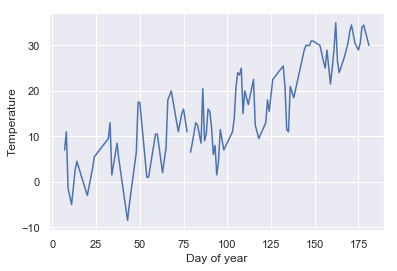

In [238]:
plt.plot(c2['Max Temp (°C)'])
plt.xlabel('Day of year')
plt.ylabel('Temperature')

Text(0,0.5,'Count')

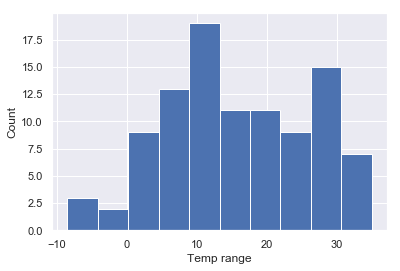

In [239]:
plt.hist(c2['Max Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

Text(0,0.5,'Count')

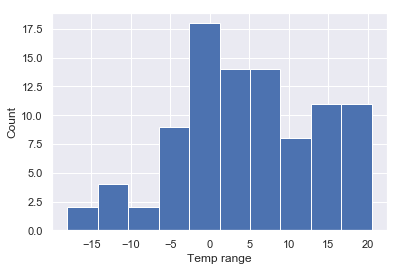

In [240]:
plt.hist(c2['Min Temp (°C)'].dropna())
plt.xlabel('Temp range')
plt.ylabel('Count')

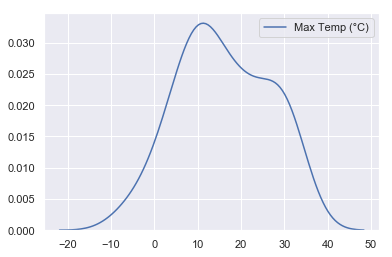

In [241]:
sns.kdeplot(c2['Max Temp (°C)'])

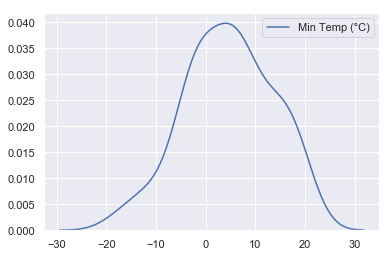

In [242]:
sns.kdeplot(c2['Min Temp (°C)'])

In [243]:
c2['Heat Deg Days (°C)']

7     21.50
8     11.00
9     21.30
11    26.50
13    22.00
14    16.70
20      nan
23      nan
24    19.80
25      nan
32    16.00
33    10.70
34    17.70
37      nan
38    16.00
43    30.30
44    29.50
48    20.80
49    11.00
50     6.70
54    18.00
55    19.30
59    13.20
60    15.20
63    19.00
65      nan
66    10.00
68     3.50
72    10.00
74     7.00
       ... 
134    8.20
135   11.20
136    5.50
138    5.70
144    0.00
145    0.00
146    0.00
147    0.00
148    0.00
149    0.00
153    0.00
155    0.00
156    0.00
157    0.00
159    2.70
160    0.70
161    0.00
162    0.00
163    0.00
164    1.70
167    0.00
169    0.00
170    0.00
171    0.00
173    0.00
175    0.00
176    0.00
177    0.00
178    0.00
181    0.00
Name: Heat Deg Days (°C), Length: 100, dtype: float64

(array([29., 12., 12., 12.,  6., 10.,  6.,  3.,  1.,  2.]),
 array([ 0.  ,  3.03,  6.06,  9.09, 12.12, 15.15, 18.18, 21.21, 24.24,
        27.27, 30.3 ]),
 <a list of 10 Patch objects>)

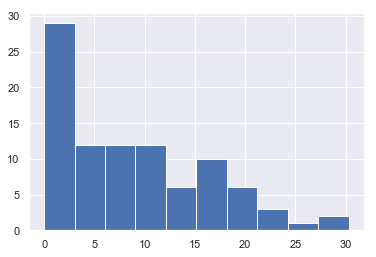

In [244]:
plt.hist(c2['Heat Deg Days (°C)'].dropna())

(array([70.,  1.,  1.,  5.,  5.,  1.,  4.,  2.,  1.,  3.]),
 array([0.  , 0.95, 1.9 , 2.85, 3.8 , 4.75, 5.7 , 6.65, 7.6 , 8.55, 9.5 ]),
 <a list of 10 Patch objects>)

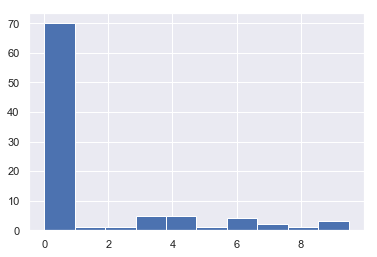

In [245]:
plt.hist(c2['Cool Deg Days (°C)'].dropna())

In [246]:
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 7 to 181
Data columns (total 13 columns):
Date                  100 non-null datetime64[ns]
Year                  100 non-null int64
Month                 100 non-null int64
Day                   100 non-null int64
Max Temp (°C)         99 non-null float64
Min Temp (°C)         93 non-null float64
Mean Temp (°C)        93 non-null float64
Heat Deg Days (°C)    93 non-null float64
Cool Deg Days (°C)    93 non-null float64
Total Rain (mm)       100 non-null float64
Total Snow (cm)       100 non-null float64
Total Precip (mm)     100 non-null float64
Snow on Grnd (cm)     100 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 10.9 KB


(array([ 3.,  0.,  8., 12., 14., 15., 14.,  5., 12., 10.]),
 array([-12.3 ,  -8.32,  -4.34,  -0.36,   3.62,   7.6 ,  11.58,  15.56,
         19.54,  23.52,  27.5 ]),
 <a list of 10 Patch objects>)

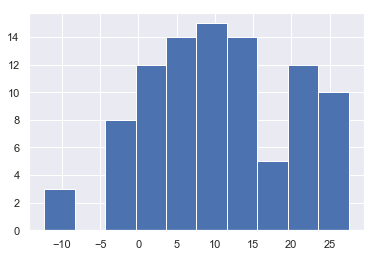

In [247]:
plt.hist(c2['Mean Temp (°C)'].dropna())

In [248]:
#creating week column
c2['week'] = c2['Date'].dt.week

In [249]:
#group by week
c2_grp = c2.groupby('week')

In [250]:
c2.aggregate(['mean', 'min', 'max'])

,Date,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
min,2016-01-08,2016.00,1.00,1.00,-8.50,-18.00,-12.30,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,2016-06-30,2016.00,6.00,31.00,35.00,20.50,27.50,30.30,9.50,32.60,7.00,32.60,12.00,26.00
mean,NaT,2016.00,3.80,15.70,15.97,4.61,10.67,8.61,1.28,2.61,0.34,2.95,0.55,14.36


In [251]:
#dropping unnecessary coulmns and aggregating on remaining columns
cols = c2.drop(['Date', 'Year', 'Month', 'Day'], axis=1).columns
climate_2016 = c2_grp[cols].mean()

In [252]:
climate_2016

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
week,,,,,,,,,,
1,5.50,-5.33,0.07,17.93,0.00,7.87,2.33,10.20,0.00,1
2,0.67,-8.17,-3.73,21.73,0.00,2.53,0.00,2.53,10.33,2
3,0.00,nan,nan,nan,nan,0.00,0.00,0.00,0.00,3
4,5.75,-9.00,-1.80,19.80,0.00,0.00,0.00,0.00,0.00,4
5,8.12,-1.67,3.20,14.80,0.00,2.65,0.00,2.65,0.00,5
6,-2.83,-11.67,-7.27,25.27,0.00,0.00,2.67,2.67,2.00,6
7,13.83,-3.50,5.17,12.83,0.00,0.00,0.00,0.00,1.33,7
8,1.00,-2.25,-0.65,18.65,0.00,12.70,3.00,15.70,3.00,8
9,7.62,-3.33,2.20,15.80,0.00,0.75,1.75,2.50,2.00,9


Week 3 has nan values. Replacing the nan values for week 3 with mean of values from week 2 and week 4

In [253]:
climate_2016.loc[3]

Max Temp (°C)        0.00
Min Temp (°C)         nan
Mean Temp (°C)        nan
Heat Deg Days (°C)    nan
Cool Deg Days (°C)    nan
Total Rain (mm)      0.00
Total Snow (cm)      0.00
Total Precip (mm)    0.00
Snow on Grnd (cm)    0.00
week                 3.00
Name: 3, dtype: float64

In [254]:
climate_2016.loc[3, 'Min Temp (°C)'] = climate_2016.loc[2, 'Min Temp (°C)'] + climate_2016.loc[4, 'Min Temp (°C)']
climate_2016.loc[3, 'Min Temp (°C)']

-17.166666666666664

In [255]:
climate_2016.loc[3, 'Mean Temp (°C)'] = climate_2016.loc[2, 'Mean Temp (°C)'] + climate_2016.loc[4, 'Mean Temp (°C)']
climate_2016.loc[3, 'Heat Deg Days (°C)'] = climate_2016.loc[2, 'Heat Deg Days (°C)'] + climate_2016.loc[4, 'Heat Deg Days (°C)']
climate_2016.loc[3, 'Cool Deg Days (°C)'] = climate_2016.loc[2, 'Cool Deg Days (°C)'] + climate_2016.loc[4, 'Cool Deg Days (°C)']

# Merging 2015 and 2016 data

In [256]:
climate_merge = pd.concat([climate_2015, climate_2016])

In [257]:
climate_merge

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
week,,,,,,,,,,
27,25.50,13.20,19.36,0.10,1.46,0.00,0.00,0.00,0.00,27
28,24.83,15.33,20.10,0.28,2.38,4.42,0.00,4.42,0.00,28
29,28.75,17.58,23.18,0.00,5.18,1.40,0.00,1.40,0.00,29
30,29.75,16.60,23.06,0.00,5.06,0.90,0.00,0.90,0.00,30
31,31.58,17.50,24.57,0.00,6.57,4.63,0.00,4.63,0.00,31
32,27.20,16.00,21.65,0.00,3.65,0.28,0.00,0.28,0.00,32
33,29.62,18.25,23.95,0.00,5.95,2.90,0.00,2.90,0.00,33
34,28.42,18.42,23.45,0.00,5.45,5.13,0.00,5.13,0.00,34
35,24.00,16.50,20.25,0.75,3.00,0.00,0.00,0.00,0.00,35


In [258]:
climate_merge.isnull().sum()

Max Temp (°C)         0
Min Temp (°C)         0
Mean Temp (°C)        0
Heat Deg Days (°C)    0
Cool Deg Days (°C)    0
Total Rain (mm)       0
Total Snow (cm)       0
Total Precip (mm)     0
Snow on Grnd (cm)     0
week                  0
dtype: int64

In [259]:
climate_merge.describe()

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,17.45,6.62,12.19,7.71,1.55,2.60,0.25,2.85,0.39,27.00
std,9.66,9.11,9.13,8.53,2.26,3.23,0.74,3.50,1.52,15.44
min,-2.83,-17.17,-7.27,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,8.50,-1.20,5.72,0.10,0.00,0.28,0.00,0.30,0.00,14.00
50%,17.60,6.00,12.40,5.60,0.00,1.10,0.00,1.72,0.00,27.00
75%,26.00,15.33,20.55,12.28,3.00,4.20,0.00,4.25,0.00,40.00
max,32.25,18.70,24.57,41.53,6.57,12.80,3.00,15.70,10.33,53.00


In [260]:
climate_merge.shape

(53, 10)

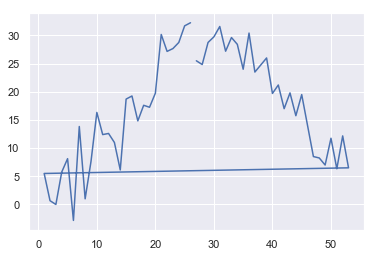

In [261]:
plt.plot(climate_merge['Max Temp (°C)'])

In [262]:
climate_dummy = climate_merge.reset_index(drop = True)
climate_dummy

,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),week
0,25.50,13.20,19.36,0.10,1.46,0.00,0.00,0.00,0.00,27
1,24.83,15.33,20.10,0.28,2.38,4.42,0.00,4.42,0.00,28
2,28.75,17.58,23.18,0.00,5.18,1.40,0.00,1.40,0.00,29
3,29.75,16.60,23.06,0.00,5.06,0.90,0.00,0.90,0.00,30
4,31.58,17.50,24.57,0.00,6.57,4.63,0.00,4.63,0.00,31
5,27.20,16.00,21.65,0.00,3.65,0.28,0.00,0.28,0.00,32
6,29.62,18.25,23.95,0.00,5.95,2.90,0.00,2.90,0.00,33
7,28.42,18.42,23.45,0.00,5.45,5.13,0.00,5.13,0.00,34
8,24.00,16.50,20.25,0.75,3.00,0.00,0.00,0.00,0.00,35
9,30.42,18.70,24.46,0.00,6.46,10.10,0.00,10.10,0.00,36


Text(0,0.5,'Weekly Mean Temperature')

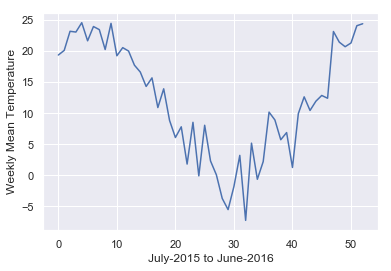

In [263]:
plt.plot(climate_dummy['Mean Temp (°C)'])
plt.xlabel('July-2015 to June-2016')
plt.ylabel('Weekly Mean Temperature')

# AdStock

In [264]:
df_ex2

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan
5,2015,12,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,nan,nan
6,2016,1,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
7,2016,2,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,nan,nan
8,2016,3,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
9,2016,4,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,nan,nan


In [265]:
df_ex2

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,nan,nan
1,2015,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,nan,nan
2,2015,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,nan,nan
3,2015,10,170.16,6.14,12.62,84.67,3.44,24.37,6.97,31.93,nan,nan
4,2015,11,51.22,4.22,1.28,14.17,0.17,19.56,6.60,5.22,nan,nan
5,2015,12,106.75,5.40,3.06,56.71,1.07,22.50,6.83,11.18,nan,nan
6,2016,1,74.20,4.38,0.46,4.20,0.90,22.90,7.37,4.20,2.70,27.09
7,2016,2,48.05,2.59,1.91,11.73,0.60,19.89,6.47,4.87,nan,nan
8,2016,3,100.02,9.30,2.10,41.59,0.37,18.44,6.22,5.19,0.87,15.95
9,2016,4,56.85,5.21,0.87,24.31,0.03,16.51,5.69,4.22,nan,nan


In [266]:
df_ex2['Year'] = df_ex2['Year'].astype('int')
df_ex2['Month'] = df_ex2['Month'].astype('int')

In [267]:
ad_spend = df_ex2.copy()

In [432]:
ad_spend[' Affiliates']

0    0.55
1    0.07
2    5.04
3    6.97
4    6.60
5    6.83
6    7.37
7    6.47
8    6.22
9    5.69
10   6.80
11   2.77
Name:  Affiliates, dtype: float64

In [278]:
def adstock_creation(adstock_rate, advertising_spend):
    adstock_medium = []
    for i in range(len(advertising_spend)):
        if i == 0:
            adstock_medium.append(advertising_spend[i])
        else:
            adstock_medium.append(advertising_spend[i] + adstock_rate * adstock_medium[i-1])
    return adstock_medium

In [281]:
ad_spend['TV_adstock'] = adstock_creation(0.5, ad_spend['TV'])

In [412]:
ad_spend.fillna(0, inplace = True)

In [433]:
ad_spend.rename(columns = {' Affiliates': 'Affiliates'}, inplace = True)

In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [394]:
gmv = np.random.randint(1,10000, 12)

In [395]:
df = pd.DataFrame(gmv, columns = ['gmv'])

In [396]:
df

,gmv
0,9314
1,4665
2,2446
3,1982
4,9058
5,7074
6,928
7,864
8,6042
9,4554


In [436]:
adstock_columns = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates', 'SEM', 'Radio','Other']
adstock_rate_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [414]:
def return_best_adstock_rate(advertising_spend, adstock_rate_range):
    best_rate = 0.1
    lowest_mse = 0
    #dummy_df = pd.Series()
    
    
    for rate in adstock_rate_range:
        
        adstock_medium = []
        
        for i in range(len(advertising_spend)):
            if i == 0:
                adstock_medium.append(advertising_spend[i])
            else:
                adstock_medium.append(advertising_spend[i] + rate * adstock_medium[i-1])
           
        temp_adstock = pd.DataFrame(adstock_medium) 
        
        lr = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(temp_adstock, df['gmv'], test_size = 0.3, random_state = 4)
        
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        
        temp_mse = mean_squared_error(y_test, y_pred)
        print(temp_mse)  
        if(rate == 0.1):
            lowest_mse = temp_mse
        elif(temp_mse < lowest_mse):
            lowest_mse = temp_mse
            best_rate = rate
    
    #print(y_test)
    return best_rate
        

In [434]:
best_rate = return_best_adstock_rate(ad_spend['Affiliates'], adstock_rate_range)

11552546.054833803
11723857.366534283
11912761.608299239
12111811.420134762
12321630.111437248
12543033.693554694
12761166.317983352
12932733.218476065
13000153.388848204


In [435]:
best_rate

0.1